# Heart Attack Data Analysis & Prediction

In [647]:
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [648]:
#Reading the csv file heart.csv in variable 
heartdata='s3://heartp/heart.csv'
df=pd.read_csv(heartdata)

In [649]:
# looking at the first 5 rows of our data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [650]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [651]:
print('Number of rows:',df.shape[0], '\n number of columns: ',df.shape[1])

Number of rows: 303 
 number of columns:  14


In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [653]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [654]:
df.duplicated().sum()

1

In [655]:
df.drop_duplicates(inplace=True)
print('Number of rows are',df.shape[0], 'and number of columns are ',df.shape[1])

Number of rows are 302 and number of columns are  14


In [656]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [657]:
#This is to look at what all unique values have . Just trying to use python
list_col=['sex','chol','trtbps','cp','thall','exng']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

SEX :[1 0] 
CHOL :[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131] 
TRTBPS :[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 
CP :[3 2 1 0] 
THALL :[1 2 3 0] 
EXNG :[0 1] 


Number of people having sex as 0 are 96 and Number of people having sex as 1 are 206


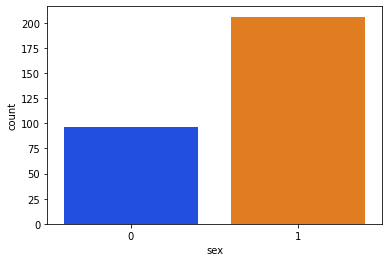

In [658]:
print(f'Number of people having sex as 0 are {df.sex.value_counts()[0]} and Number of people having sex as 1 are {df.sex.value_counts()[1]}')
p = sns.countplot(data=df, x="sex", palette='bright')
plt.show()

<AxesSubplot:xlabel='cp', ylabel='count'>

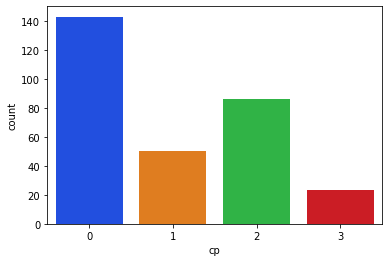

In [659]:
sns.countplot(x='cp', data=df, palette='bright')

<AxesSubplot:xlabel='fbs', ylabel='count'>

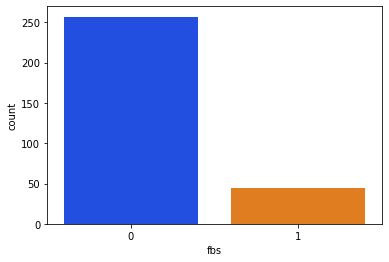

In [660]:
sns.countplot(x='fbs', data=df, palette='bright')

<AxesSubplot:xlabel='thall', ylabel='count'>

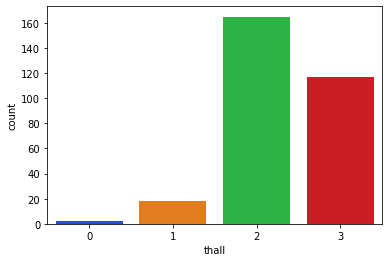

In [661]:
sns.countplot(x='thall', data=df, palette='bright')

<AxesSubplot:xlabel='restecg', ylabel='count'>

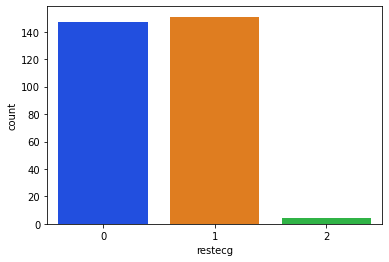

In [662]:
sns.countplot(x='restecg', data=df, palette='bright')

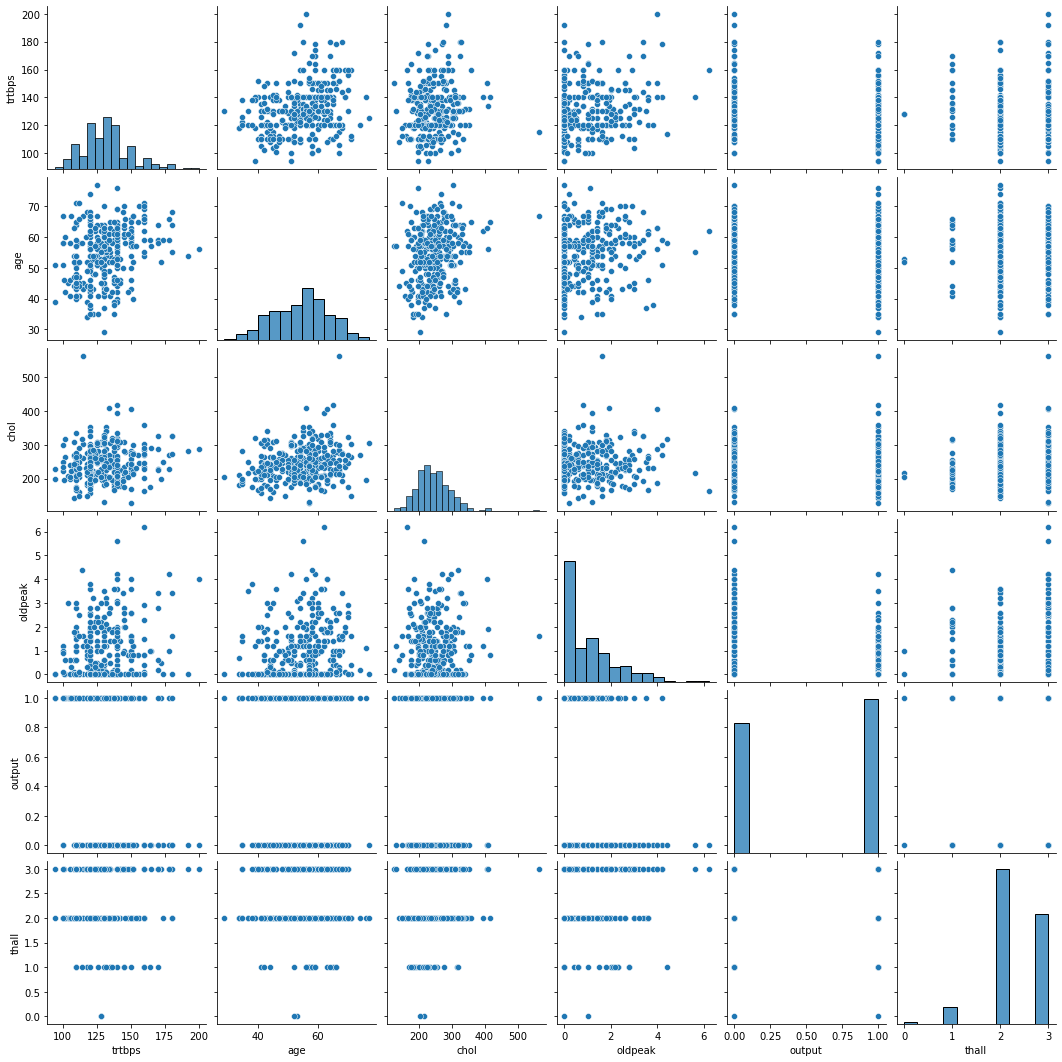

In [663]:

#Pair-Plot
feature = ['trtbps', 'age', 'chol', 'oldpeak', 'output','thall' ]
sns.pairplot(df[feature], kind='scatter', diag_kind='hist')

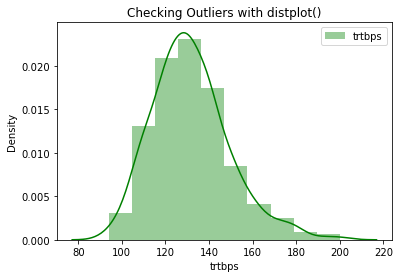

In [664]:
sns.color_palette("bright")
plt.title('Checking Outliers with distplot()')
sns.distplot(df.trtbps, label='trtbps', kde=True, bins=10, color='green')
plt.legend()

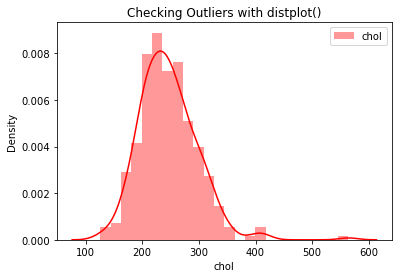

In [665]:
plt.title('Checking Outliers with distplot()')
sns.distplot(df.chol, label='chol', kde=True, color='red')
plt.legend()

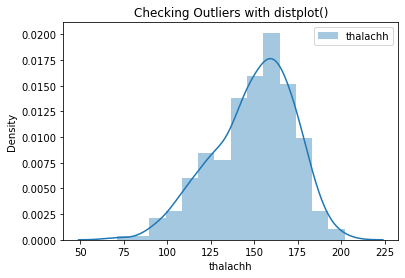

In [666]:
plt.title('Checking Outliers with distplot()')
sns.distplot(df['thalachh'],label='thalachh', kde=True )
plt.legend()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

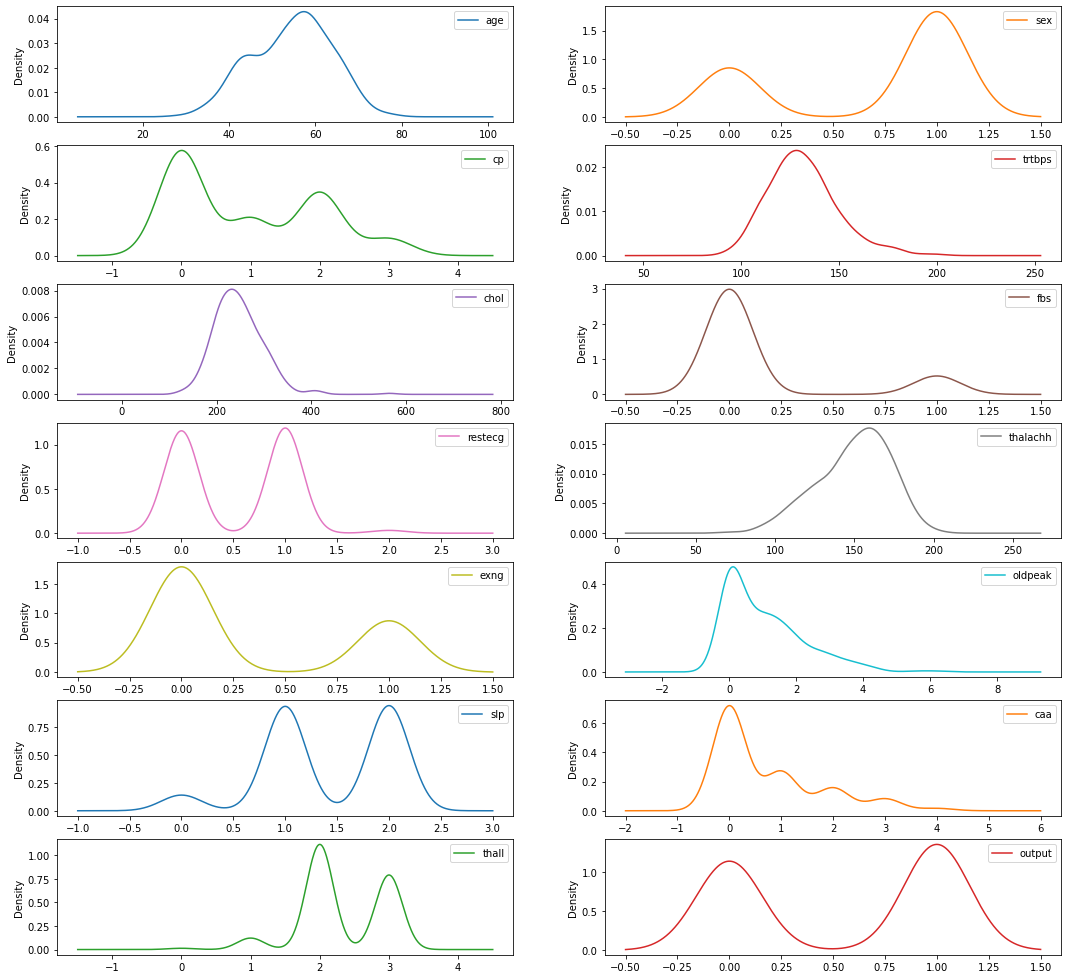

In [667]:
#Density Plot
df.plot(kind='density', subplots=True, layout=(8,2), sharex=False , figsize =(18,20))

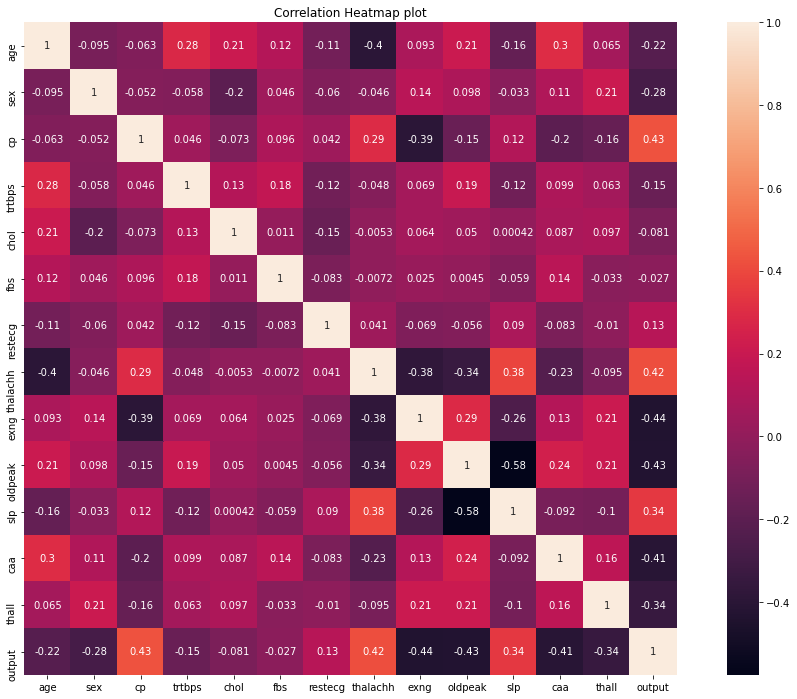

In [668]:
#Correlation
correlation = df.corr()
correlation
#Heat map
plt.figure(figsize=(18,12))
plt.title('Correlation Heatmap plot')
a = sns.heatmap(correlation, square=True, annot=True)
a.set_xticklabels(a.get_xticklabels())
a.set_yticklabels(a.get_yticklabels())           
plt.show()

In [669]:
X = df.drop('output', axis = 1)
y = df['output']

In [670]:
df.reset_index(drop=True, inplace=True)

In [671]:
columns_to_scale = df.iloc[:,[0,3,4,7,9,]]
columns_to_scale

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
297,57,140,241,123,0.2
298,45,110,264,132,1.2
299,68,144,193,141,3.4
300,57,130,131,115,1.2


In [672]:
# Spliting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ss = StandardScaler()
scaled_values = ss.fit_transform(columns_to_scale)
scaled_values = pd.DataFrame(scaled_values, columns=columns_to_scale.columns)
scaled_values

,age,trtbps,chol,thalachh,oldpeak
0,0.949794,0.764066,-0.261285,0.018826,1.084022
1,-1.928548,-0.091401,0.067741,1.636979,2.118926
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608
4,0.285561,-0.661712,2.080602,0.587366,-0.382092
...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-1.161988,-0.727060
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360
299,1.503322,0.707035,-1.035462,-0.374779,2.032684
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360


In [673]:
scaled_df = pd.concat([scaled_values,df.iloc[:,[1,2,5,6,8,10,11,12,13]]],axis=1)
scaled_df

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,3,1,0,0,0,0,1,1
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,2,0,1,0,0,0,2,1
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,0,1,0,0,0,2,0,2,1
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,1,0,2,0,2,1
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-1.161988,-0.727060,0,0,0,1,1,1,0,3,0
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360,1,3,0,1,0,1,0,3,0
299,1.503322,0.707035,-1.035462,-0.374779,2.032684,1,0,1,1,0,1,2,3,0
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360,1,0,0,1,1,1,1,3,0


In [674]:
key = ['NaiveBayes','Neural Net','LogisticRegression','KNN','SVC','DecisionTree','RandomForest','GradientBoost','AdaBoost','XGB']
value = [GaussianNB(),MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),LogisticRegression(random_state=9), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), xgb.XGBClassifier()]
models = dict(zip(key,value))

In [675]:
predicted =[]

NaiveBayes 0.8852459016393442
Neural Net 0.5245901639344263
LogisticRegression 0.8524590163934426
KNN 0.6557377049180327
SVC 0.7049180327868853
DecisionTree 0.7868852459016393
RandomForest 0.8852459016393442
GradientBoost 0.8524590163934426
AdaBoost 0.7868852459016393
[03:36:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB 0.8524590163934426


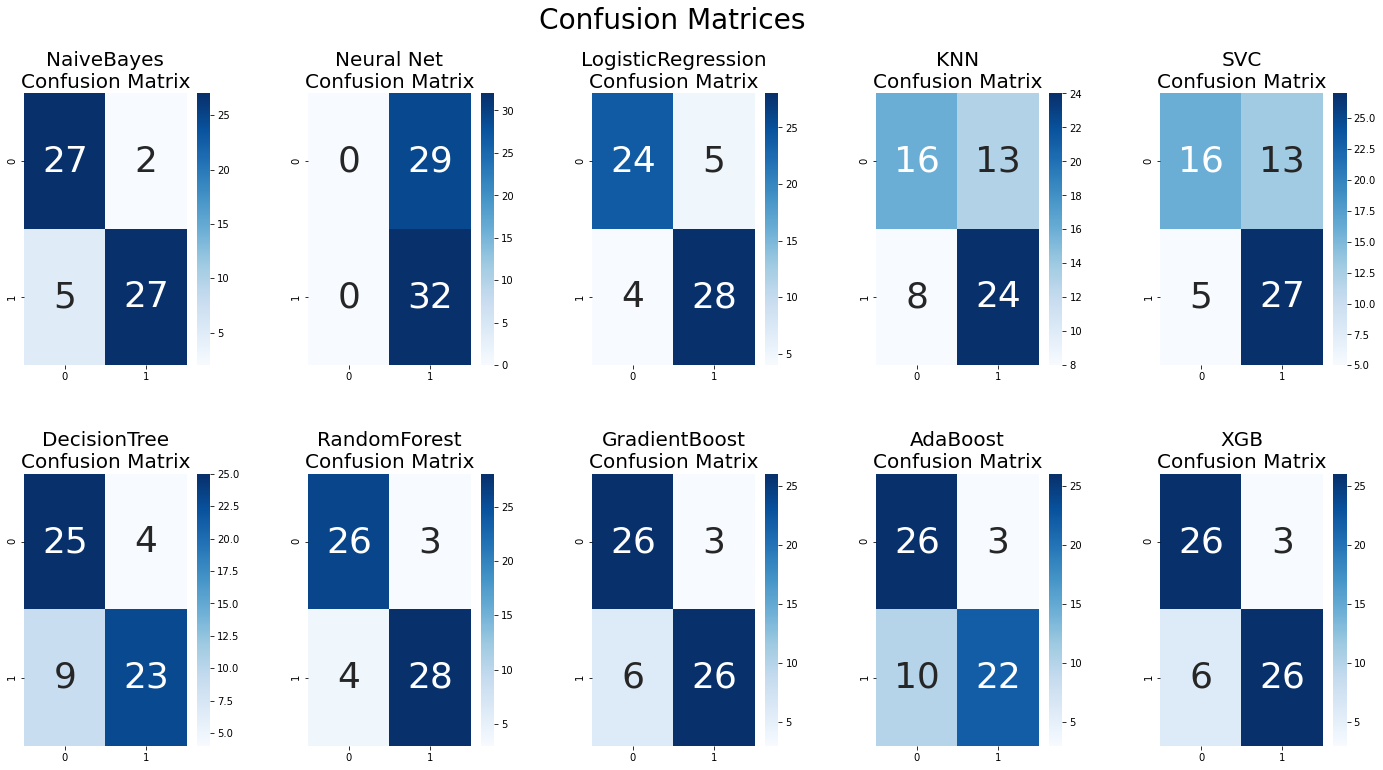

In [676]:
i=1
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices",fontsize=28)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    cm = confusion_matrix(y_test,model.predict(X_test))
    plt.subplot(2,5,i)
    i +=1
    plt.title(name+"\nConfusion Matrix",fontsize=20)
    sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 36})
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)
    


In [677]:
# Predicted values for the test dataset
print(y_head_lr)


0.8524590163934426


Text(0.5, 0, 'Classifier')

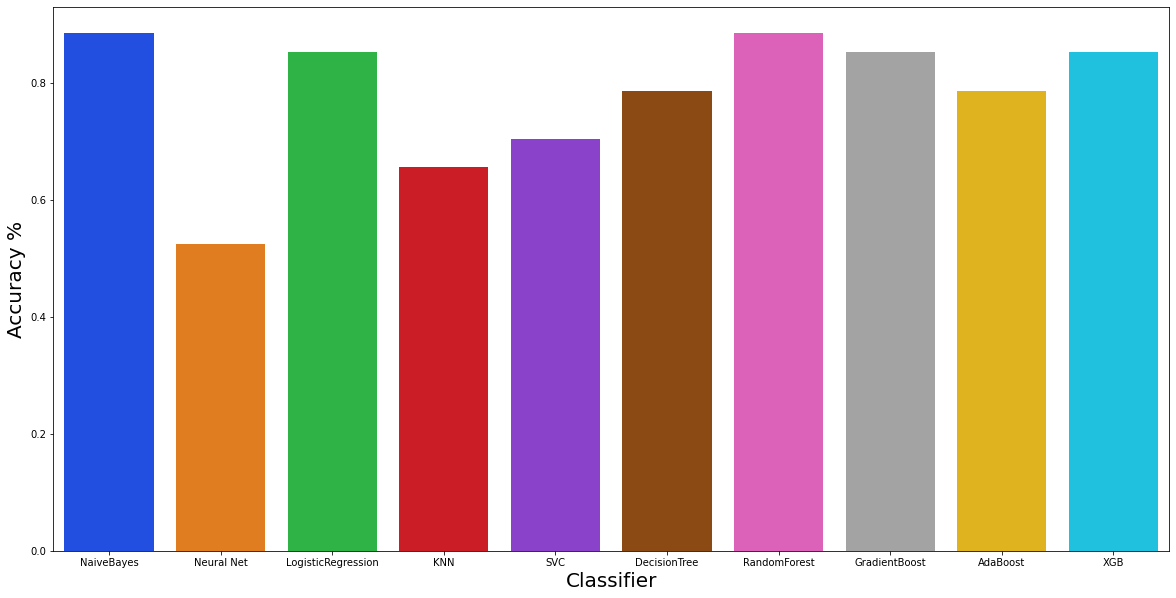

In [678]:
plt.figure(figsize = (20,10))
sns.barplot(x = key, y = predicted, palette='bright')
plt.ylabel("Accuracy %",fontsize=20)
plt.xlabel("Classifier",fontsize=20)

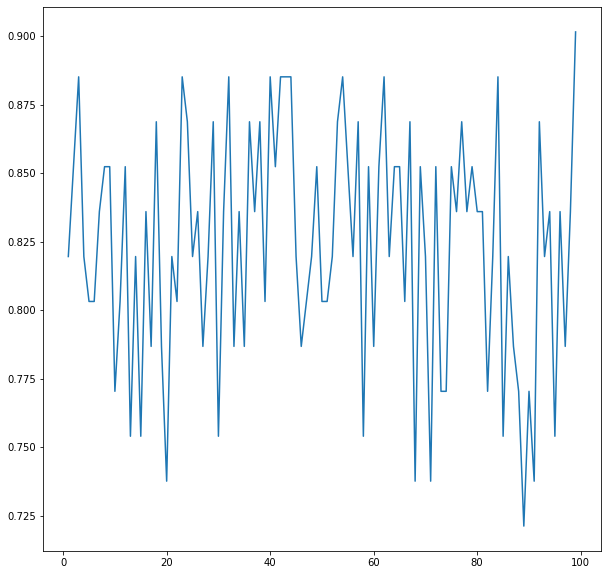

In [679]:
nb = GaussianNB()
it = []
acc = []
for i in range(1,100,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)   
    model_nb = nb.fit(X_train, y_train.values.ravel())
    predict_values_nb = model_nb.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_nb))
    it.append(i)
    
plt.figure(figsize=(10,10))
plt.plot(it, acc)

In [680]:
#Exporting model using joblib library
import joblib
joblib.dump(model_nb,"heartp_model.pkl")

['heartp_model.pkl']

In [685]:
import tempfile
import boto3
s3 = boto3.resource('s3')

# dumping it in .pkl format 
location = 'heart/'
model_filename = 'nbmodel.pkl'  
OutputFile = location + model_filename

# WRITE
with tempfile.TemporaryFile() as fp:
    joblib.dump(model_nb, fp)
    fp.seek(0)
    # bucket_name and OutputFile - s3 location path in string format.
    s3.Bucket('heartp').put_object(Key= OutputFile, Body=fp.read())

In [682]:
from ipywidgets import widgets
it1=widgets.BoundedFloatText(
    value=50,
    min=0,
    max=1000,
    step=1,
    description='Age:',
    disabled=False,
    layout={'width': 'max-content'}
)
display(it1)
d1=widgets.Dropdown(
    options=['1', '0'],
    value='1',
    description='Sex:',
    disabled=False,
    layout={'width': 'max-content'}
)
display(d1)
it2=widgets.BoundedFloatText(
    value=0,
    min=0,
    max=1000,
    step=1,
    description='Cp:',
    disabled=False,
    layout={'width': 'max-content'}
)
display(it2)
it3=widgets.BoundedFloatText(
    value=140,
    min=0,
    max=1000,
    step=1,
    description='Trestbps:',
    disabled=False,
    layout={'width': 'max-content'}
)
display(it3)
it4=widgets.BoundedFloatText(
    value=190,
    min=0,
    max=1000,
    step=1,
    description='Cholestrol:',
    disabled=False,
    layout={'width': 'max-content'}
)
display(it4)
it5=widgets.BoundedFloatText(
    value=0,
    min=0,
    max=1000,
    step=1,
    description='Fbs:',
    disabled=False,
    layout={'width': 'max-content'}
)
display(it5)
it6=widgets.BoundedFloatText(
    value=1,
    min=0,
    max=100,
    step=1,
    description='Restecg:',
    disabled=False,
    layout={'width': 'max-content'}
)
display(it6)
it7=widgets.BoundedFloatText(
    value=148,
    min=0,
    max=1000,
    step=1,
    description='Thalachh:',
    disabled=False,
    layout={'width': 'max-content'}
)
display(it7)
it8=widgets.BoundedFloatText(
    value=0,
    min=0,
    max=100,
    step=1,
    description='Exang:',
    disabled=False,
    layout={'width': 'max-content'}
)
display(it8)
it9=widgets.BoundedFloatText(
    value=0,
    min=0,
    max=100,
    step=0.1,
    description='Oldpeak:',
    disabled=False,
    layout={'width': 'max-content'}
)
display(it9)
it10=widgets.BoundedFloatText(
    value=0,
    min=0,
    max=100,
    step=1,
    description='Slope:',
    disabled=False,
    layout={'width': 'max-content'}
)
display(it10)
it11=widgets.BoundedFloatText(
    value=0,
    min=0,
    max=100,
    step=1,
    description='Caa:',
    disabled=False,
    layout={'width': 'max-content'}
)
display(it11)
it12=widgets.BoundedFloatText(
    value=1,
    min=0,
    max=100,
    step=1,
    description='Thall:',
    disabled=False,
    layout={'width': 'max-content'}
)
display(it12)

BoundedFloatText(value=50.0, description='Age:', layout=Layout(width='max-content'), max=1000.0, step=1.0)

Dropdown(description='Sex:', layout=Layout(width='max-content'), options=('1', '0'), value='1')

BoundedFloatText(value=0.0, description='Cp:', layout=Layout(width='max-content'), max=1000.0, step=1.0)

BoundedFloatText(value=140.0, description='Trestbps:', layout=Layout(width='max-content'), max=1000.0, step=1.…

BoundedFloatText(value=190.0, description='Cholestrol:', layout=Layout(width='max-content'), max=1000.0, step=…

BoundedFloatText(value=0.0, description='Fbs:', layout=Layout(width='max-content'), max=1000.0, step=1.0)

BoundedFloatText(value=1.0, description='Restecg:', layout=Layout(width='max-content'), step=1.0)

BoundedFloatText(value=148.0, description='Thalachh:', layout=Layout(width='max-content'), max=1000.0, step=1.…

BoundedFloatText(value=0.0, description='Exang:', layout=Layout(width='max-content'), step=1.0)

BoundedFloatText(value=0.0, description='Oldpeak:', layout=Layout(width='max-content'), step=0.1)

BoundedFloatText(value=0.0, description='Slope:', layout=Layout(width='max-content'), step=1.0)

BoundedFloatText(value=0.0, description='Caa:', layout=Layout(width='max-content'), step=1.0)

BoundedFloatText(value=1.0, description='Thall:', layout=Layout(width='max-content'), step=1.0)

In [683]:
predict_values_nb = model_nb.predict(np.array([it1.value,d1.value,it2.value,it3.value,it4.value,it5.value,it6.value,it7.value,it8.value,it9.value,it10.value,it11.value,it12.value]).reshape(1,-1))

In [684]:
if predict_values_nb==1:
    print("Heart Attack!!!")
else :
    print("You saved yourself")

Heart Attack!!!
